## Import All Libraries


In [1]:
#Import aLL Libary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
#import keras as k
#import timeit

## Data Preprocessing

### Training image Preprocessing

In [2]:
print(tf.__version__)

2.11.0


In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [5]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,y.shape)
    print(y,y.shape)
    break


tf.Tensor(
[[[[ 76.75  67.25  74.75]
   [145.75 133.75 143.75]
   [149.25 137.25 147.25]
   ...
   [163.25 151.25 161.25]
   [157.25 145.25 155.25]
   [162.75 150.75 160.75]]

  [[ 77.75  68.25  75.75]
   [143.5  131.5  141.5 ]
   [145.   133.   143.  ]
   ...
   [169.25 157.25 167.25]
   [164.   152.   162.  ]
   [166.25 154.25 164.25]]

  [[ 78.25  68.75  76.25]
   [144.25 132.25 142.25]
   [144.5  132.5  142.5 ]
   ...
   [170.75 158.75 168.75]
   [172.25 160.25 170.25]
   [173.   161.   171.  ]]

  ...

  [[ 74.    59.75  65.  ]
   [138.5  118.5  127.5 ]
   [153.75 132.75 141.75]
   ...
   [149.   136.   145.  ]
   [146.5  133.5  142.5 ]
   [154.75 141.75 150.75]]

  [[ 69.    55.    60.  ]
   [135.   115.   124.  ]
   [151.75 130.75 139.75]
   ...
   [147.   134.   143.  ]
   [144.   131.   140.  ]
   [149.25 136.25 145.25]]

  [[ 70.25  55.25  61.25]
   [136.75 116.75 125.75]
   [151.5  130.5  139.5 ]
   ...
   [143.   130.   139.  ]
   [152.   139.   148.  ]
   [154.   141.   15

## To avoid Overshooting

1.Comes Small learning rate default 0.001 we are taking 0.0001

2.There may be chance Underfitting as increase number of neuron

3.Add more Convocation layers to extract more features from images there may be possibility thst model unable to capture           relevant features or model is confusing due to lack of features so feed with more features

## Buliding Model

In [7]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()

### Buliding Convocational Model

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25))# Avoid overfitting

In [15]:
model.add(Flatten())

In [16]:
#hidden layer
model.add(Dense(units=1500,activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
##Outer layer
model.add(Dense(units=38,activation='softmax'))

## Compling model

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## Model Training

In [21]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10,workers='0')

Epoch 1/10
2197/2197 [==============================] - 5435s 2s/step - loss: 1.3704 - accuracy: 0.5974 - val_loss: 0.4712 - val_accuracy: 0.8556
Epoch 2/10
2197/2197 [==============================] - 5400s 2s/step - loss: 0.4422 - accuracy: 0.8589 - val_loss: 0.3117 - val_accuracy: 0.8994
Epoch 3/10
2197/2197 [==============================] - 5619s 3s/step - loss: 0.2661 - accuracy: 0.9138 - val_loss: 0.2312 - val_accuracy: 0.9263
Epoch 4/10
2197/2197 [==============================] - 5428s 2s/step - loss: 0.1872 - accuracy: 0.9395 - val_loss: 0.2461 - val_accuracy: 0.9216
Epoch 5/10
2197/2197 [==============================] - 5439s 2s/step - loss: 0.1392 - accuracy: 0.9537 - val_loss: 0.1426 - val_accuracy: 0.9546
Epoch 6/10
2197/2197 [==============================] - 5604s 3s/step - loss: 0.1072 - accuracy: 0.9642 - val_loss: 0.2851 - val_accuracy: 0.9204
Epoch 7/10
2197/2197 [==============================] - 5445s 2s/step - loss: 0.0861 - accuracy: 0.9712 - val_loss: 0.1442 -

## Model Evalution

In [22]:
#Model Evaluation on training _set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 1407s 637ms/step - loss: 0.0142 - accuracy: 0.9956


In [23]:
print(train_loss,train_acc)

0.014164910651743412 0.9956468939781189


In [24]:
#model evaluation on validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 350s 624ms/step - loss: 0.1016 - accuracy: 0.9707


In [25]:
print(val_loss,val_acc)

0.10157802700996399 0.9707489013671875


## Saving Model

In [26]:
model.save('training_model.keras')

In [41]:
model.save('training_model.h5')

In [27]:
training_history.history

{'loss': [1.3703962564468384,
  0.4421897828578949,
  0.26607486605644226,
  0.1872333586215973,
  0.13921687006950378,
  0.10721178352832794,
  0.08613982796669006,
  0.07588160037994385,
  0.06295851618051529,
  0.05484359338879585],
 'accuracy': [0.5973824858665466,
  0.8588662147521973,
  0.9137634038925171,
  0.9394551515579224,
  0.9537236094474792,
  0.9641937613487244,
  0.9711928367614746,
  0.9750622510910034,
  0.9791592359542847,
  0.9822320342063904],
 'val_loss': [0.47120779752731323,
  0.3117167353630066,
  0.23116105794906616,
  0.24611258506774902,
  0.1425705999135971,
  0.2850520610809326,
  0.1441936194896698,
  0.10923635959625244,
  0.10593076795339584,
  0.10157802700996399],
 'val_accuracy': [0.8555656671524048,
  0.8994423151016235,
  0.9263032078742981,
  0.9215797781944275,
  0.954643726348877,
  0.9204416275024414,
  0.9574322700500488,
  0.9656840562820435,
  0.9692692756652832,
  0.9707489013671875]}

In [28]:
#Recording Histoty
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

## Accuracy Visulaization

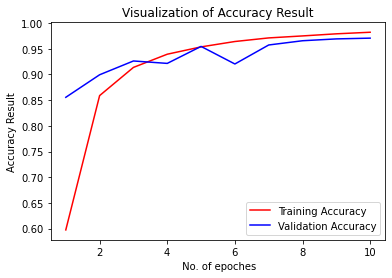

In [29]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel(" No. of epoches")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Some Other Metrics for model evaluation

In [30]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [31]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [32]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 231s 418ms/step


(array([[1.0000000e+00, 4.8886800e-10, 1.3981526e-11, ..., 7.0033371e-18,
         5.5801244e-16, 1.5521255e-14],
        [9.9998248e-01, 1.7282735e-05, 1.1996188e-09, ..., 1.8622170e-13,
         1.6210552e-12, 1.1360257e-12],
        [1.0000000e+00, 6.5538615e-15, 1.7306668e-13, ..., 6.2973850e-21,
         1.4579951e-18, 2.9542696e-16],
        ...,
        [2.4482728e-07, 1.2073480e-10, 7.1101880e-07, ..., 1.4251751e-07,
         7.3542550e-09, 9.9921119e-01],
        [3.2615745e-08, 3.9645388e-11, 6.2421228e-09, ..., 4.6766679e-09,
         1.3593457e-09, 9.9999177e-01],
        [1.2720267e-16, 3.6773333e-17, 5.5708994e-14, ..., 3.4786174e-16,
         2.0019199e-12, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [33]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [34]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [35]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [36]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.96      0.97       504
                                 Apple___Black_rot       1.00      0.96      0.98       497
                          Apple___Cedar_apple_rust       0.97      0.97      0.97       440
                                   Apple___healthy       0.99      0.96      0.97       502
                               Blueberry___healthy       0.96      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.96      1.00      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.89      0.92       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.97      0.

In [39]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

## confusion_matrix Visualization

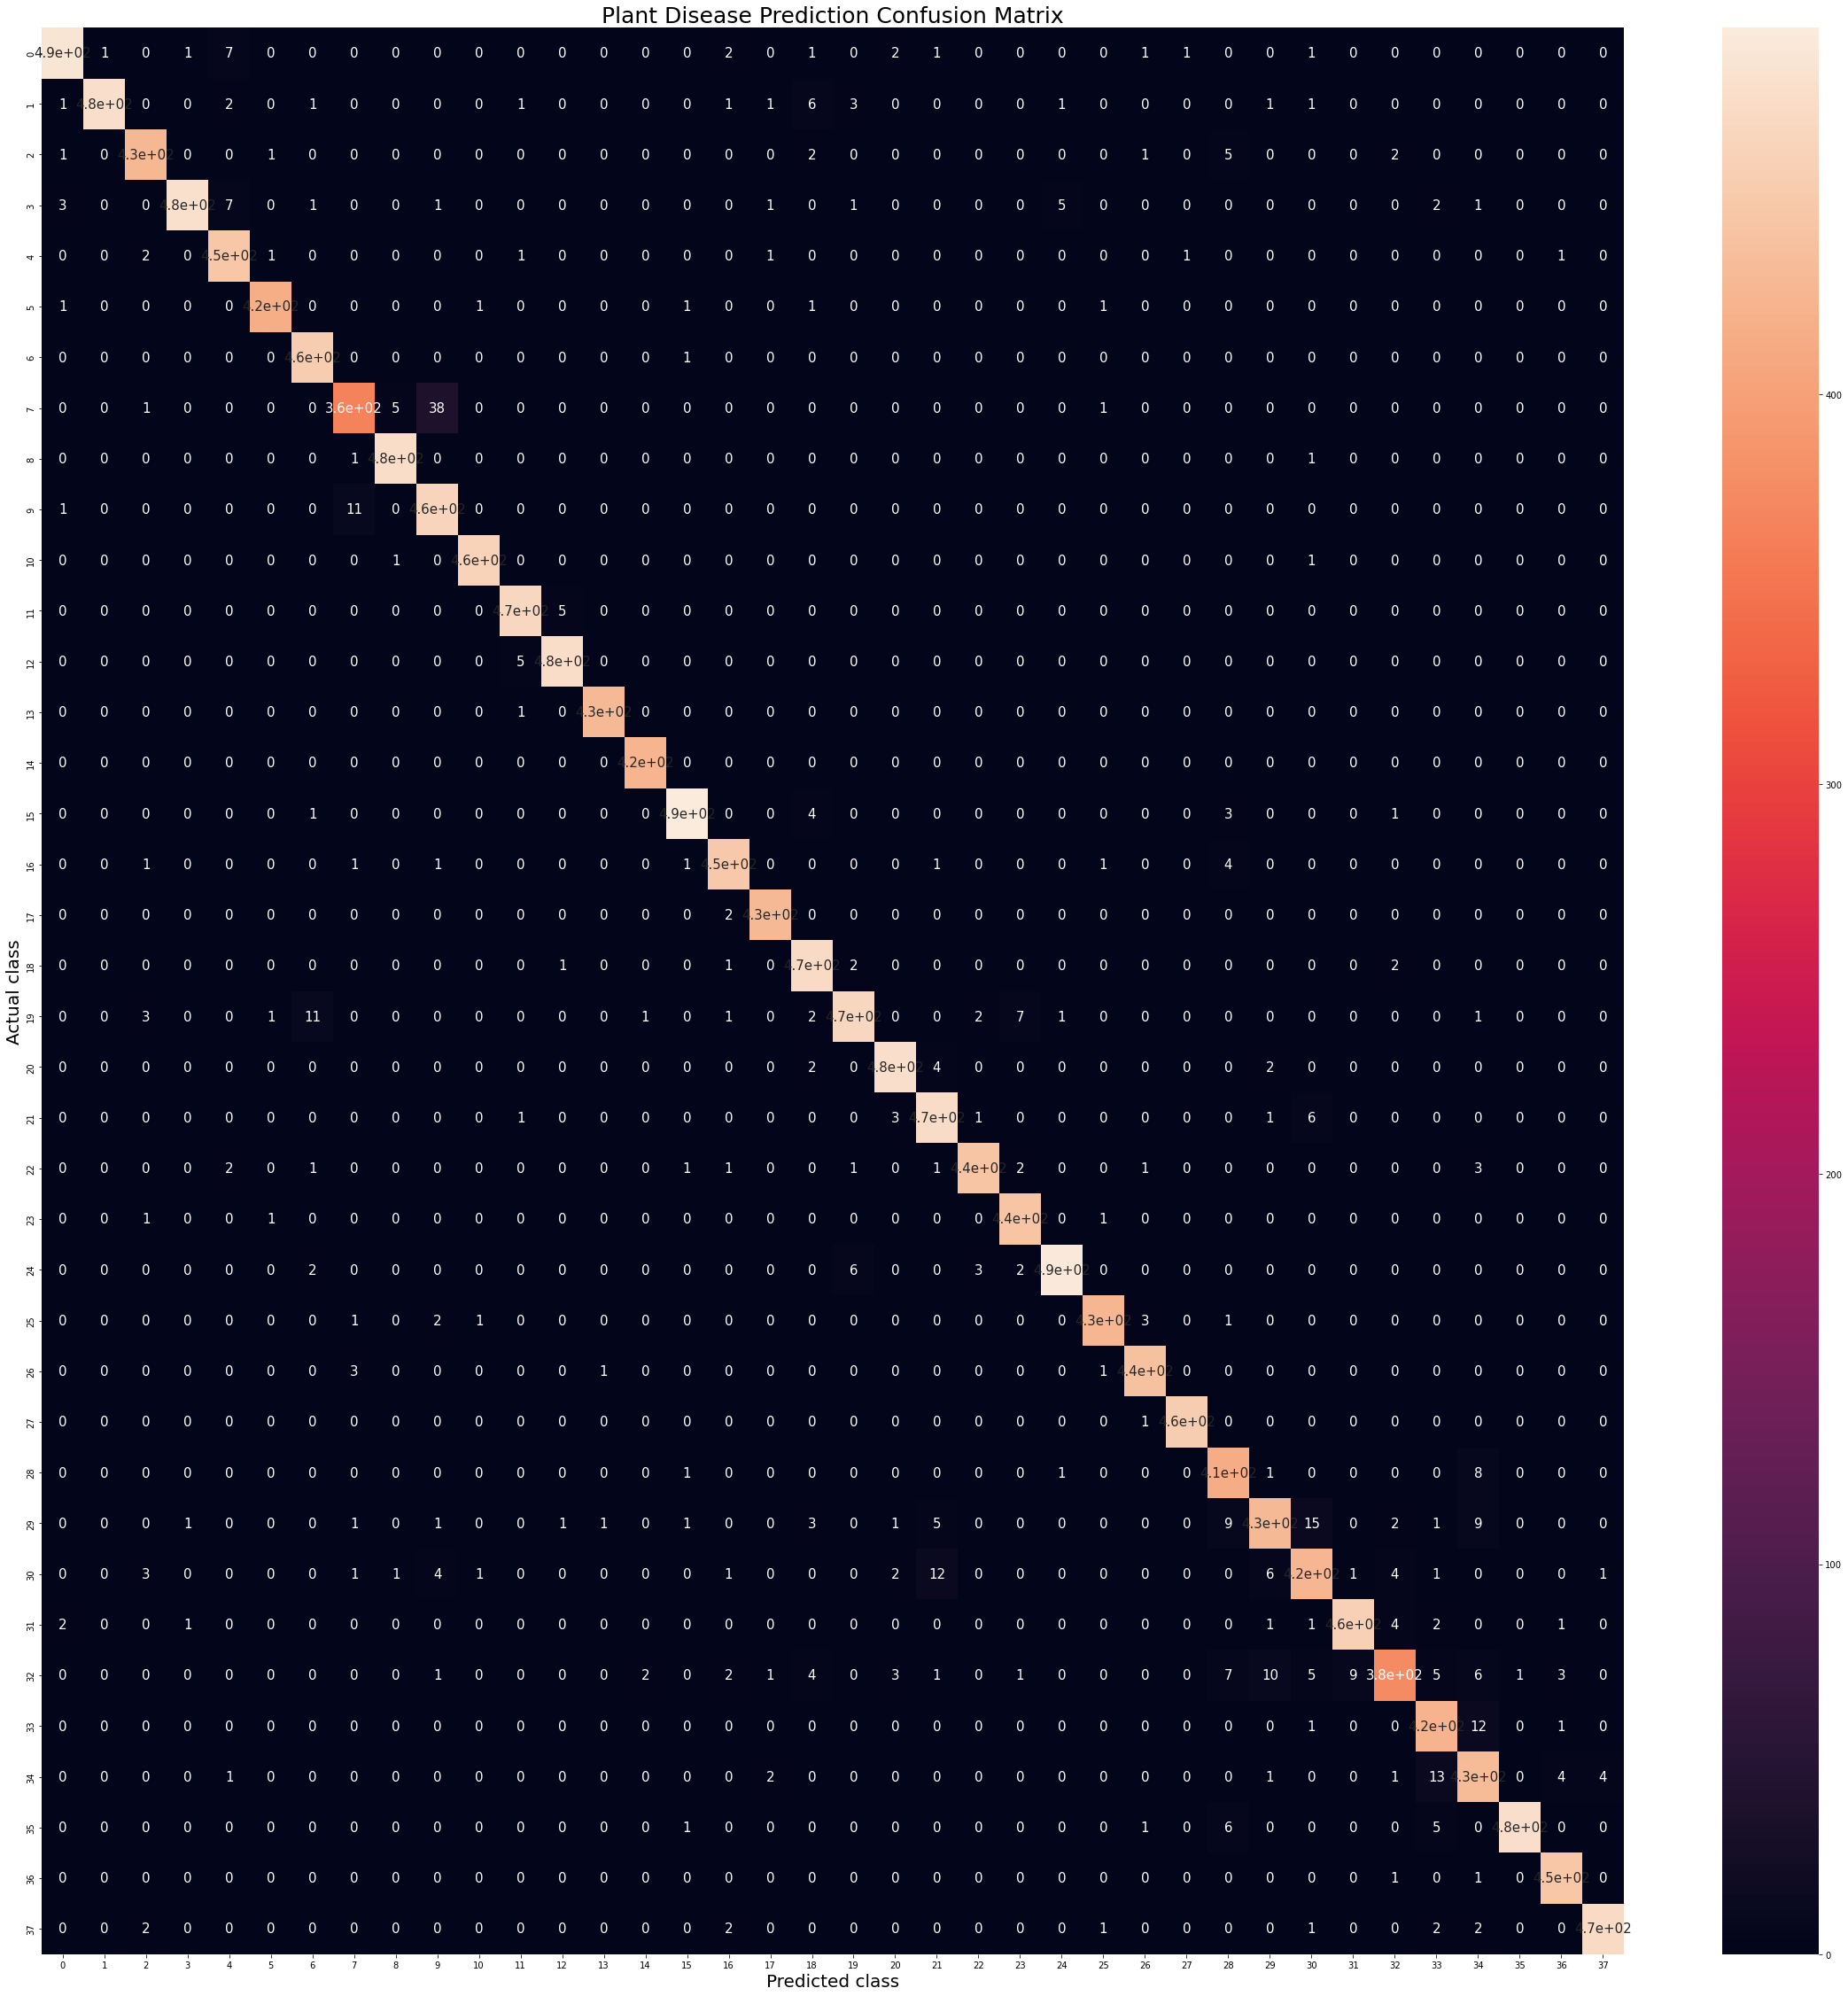

In [40]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':15})
plt.xlabel("Predicted class",fontsize=20)
plt.ylabel("Actual class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()